In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

**Importing the datas**

u.data

In [2]:
raw_data = pd.read_csv('u.data', sep='\t', header=None) 
raw_data.head()

,0,1,2,3
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


u.item

In [3]:
raw_item = pd.read_csv('u.item', sep='|', header=None, encoding='latin-1')
raw_item.head()

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


u.user

In [4]:
raw_user = pd.read_csv('u.user', sep='|', header=None)
raw_user.head()

,0,1,2,3,4
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [5]:
data = raw_data.copy()
item = raw_item.copy()
user = raw_user.copy()

Naming the columns

In [6]:
data.columns

Int64Index([0, 1, 2, 3], dtype='int64')

In [7]:
data.columns= 'user_ID', 'movie_ID', 'Rating', 'Timestamp'
data

,user_ID,movie_ID,Rating,Timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [8]:
item.columns 

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23],
           dtype='int64')

In [9]:
item.columns = 'movie_ID', 'movie_title', 'release_date', 'video_release_date', 'IMDb_URL', 'unknown', 'Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama ', 'Fantasy', 'FilmNoir', 'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller', 'War', 'Western'

In [10]:
item

,movie_ID,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1678,1679,B. Monkey (1998),06-Feb-1998,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,0,1,0,1,0,0
1679,1680,Sliding Doors (1998),01-Jan-1998,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1680,1681,You So Crazy (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
item['release_date']

0       01-Jan-1995
1       01-Jan-1995
2       01-Jan-1995
3       01-Jan-1995
4       01-Jan-1995
           ...     
1677    06-Feb-1998
1678    06-Feb-1998
1679    01-Jan-1998
1680    01-Jan-1994
1681    08-Mar-1996
Name: release_date, Length: 1682, dtype: object

In [12]:
item.iloc[:, 2] = pd.to_datetime(item.iloc[:, 2], format="%d-%b-%Y")

In [13]:
item['release_date']

0      1995-01-01
1      1995-01-01
2      1995-01-01
3      1995-01-01
4      1995-01-01
          ...    
1677   1998-02-06
1678   1998-02-06
1679   1998-01-01
1680   1994-01-01
1681   1996-03-08
Name: release_date, Length: 1682, dtype: datetime64[ns]

In [14]:
user.columns

Int64Index([0, 1, 2, 3, 4], dtype='int64')

In [15]:
user.columns = 'user_ID', 'age', 'gender', 'occupation', 'zip_code'
user

,user_ID,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Merging tables

In [16]:
data_UD = user.merge(data, how='inner', on='user_ID')
data_UD

,user_ID,age,gender,occupation,zip_code,movie_ID,Rating,Timestamp
0,1,24,M,technician,85711,61,4,878542420
1,1,24,M,technician,85711,189,3,888732928
2,1,24,M,technician,85711,33,4,878542699
3,1,24,M,technician,85711,160,4,875072547
4,1,24,M,technician,85711,20,4,887431883
...,...,...,...,...,...,...,...,...
99995,943,22,M,student,77841,415,1,888640027
99996,943,22,M,student,77841,219,4,888639575
99997,943,22,M,student,77841,796,3,888640311
99998,943,22,M,student,77841,739,4,888639929


In [17]:
data_all = data_UD.merge(item, how='inner', on='movie_ID')
data_all.head()

,user_ID,age,gender,occupation,zip_code,movie_ID,Rating,Timestamp,movie_title,release_date,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),1994-01-01,...,0,0,0,0,0,0,0,0,0,0
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),1994-01-01,...,0,0,0,0,0,0,0,0,0,0
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),1994-01-01,...,0,0,0,0,0,0,0,0,0,0
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White (1994),1994-01-01,...,0,0,0,0,0,0,0,0,0,0
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White (1994),1994-01-01,...,0,0,0,0,0,0,0,0,0,0


In [18]:
data_all_sorted = data_all.sort_values(ascending=True, by='movie_ID')
data_all_sorted.head()

,user_ID,age,gender,occupation,zip_code,movie_ID,Rating,Timestamp,movie_title,release_date,...,Fantasy,FilmNoir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
26095,83,40,M,other,44133,1,4,880306903,Toy Story (1995),1995-01-01,...,0,0,0,0,0,0,0,0,0,0
26197,303,19,M,student,14853,1,5,879466966,Toy Story (1995),1995-01-01,...,0,0,0,0,0,0,0,0,0,0
26198,305,23,M,programmer,94086,1,5,886323153,Toy Story (1995),1995-01-01,...,0,0,0,0,0,0,0,0,0,0
26199,307,25,M,student,55454,1,5,878066938,Toy Story (1995),1995-01-01,...,0,0,0,0,0,0,0,0,0,0
26200,308,60,M,retired,95076,1,4,887736532,Toy Story (1995),1995-01-01,...,0,0,0,0,0,0,0,0,0,0


**Analizys**

Display univariate plots of the attributes: 'rating', 'age', 'release date', 'gender' and 'occupation', from their respective data frames

'rating'

In [19]:
data['Rating'].value_counts()

4    34174
3    27145
5    21201
2    11370
1     6110
Name: Rating, dtype: int64

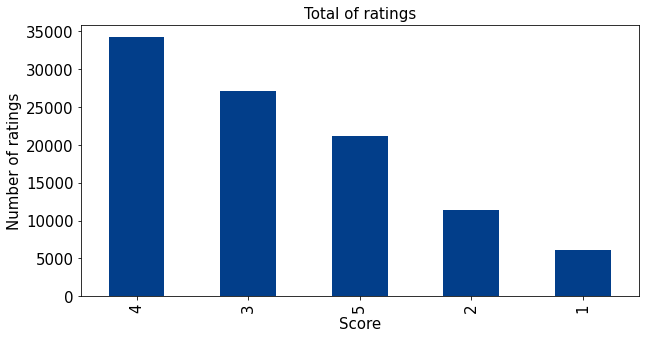

In [20]:
plt.figure(figsize=(10,5))
data['Rating'].value_counts().plot(kind='bar', fontsize=15, color='#023e8a')
plt.title('Total of ratings', fontsize=15)
plt.xlabel('Score', fontsize=15)
plt.ylabel('Number of ratings', fontsize=15)
plt.show()

'age'


In [21]:
user['age'].value_counts()

30    39
25    38
22    37
28    36
27    35
      ..
7      1
66     1
11     1
10     1
73     1
Name: age, Length: 61, dtype: int64

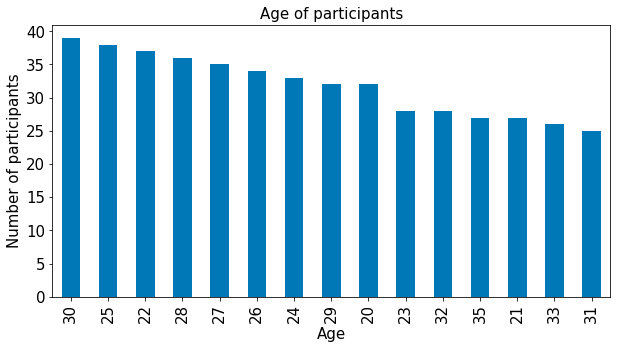

In [22]:
plt.figure(figsize=(10,5))
user['age'].value_counts().head(15).plot(kind='bar', fontsize=15, color='#0077b6')
plt.title('Age of participants', fontsize=15)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Number of participants', fontsize=15)
plt.show()

'release date'

In [23]:
item['release_date'].value_counts()

1995-01-01    215
1994-01-01    213
1993-01-01    126
1997-01-01     98
1992-01-01     37
             ... 
1996-01-29      1
1995-12-18      1
1995-09-25      1
1996-03-09      1
1997-04-30      1
Name: release_date, Length: 240, dtype: int64

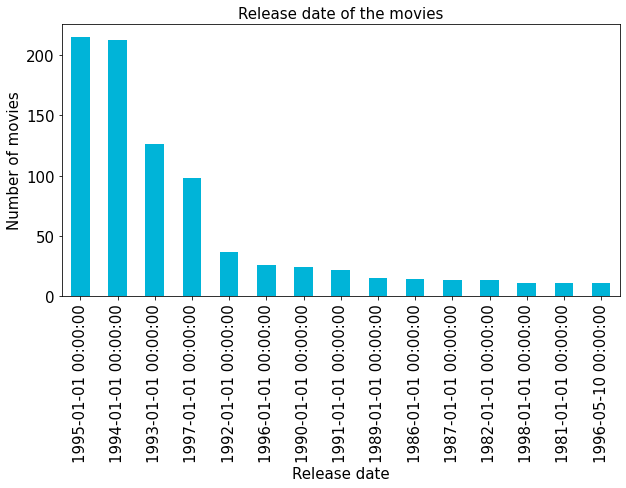

In [24]:
plt.figure(figsize=(10,5))
item['release_date'].value_counts().head(15).plot(kind='bar', fontsize=15, color='#00b4d8')
plt.title('Release date of the movies', fontsize=15)
plt.xlabel('Release date', fontsize=15)
plt.ylabel('Number of movies', fontsize=15)
plt.show()

'gender'

In [25]:
user['gender'].value_counts()

M    670
F    273
Name: gender, dtype: int64

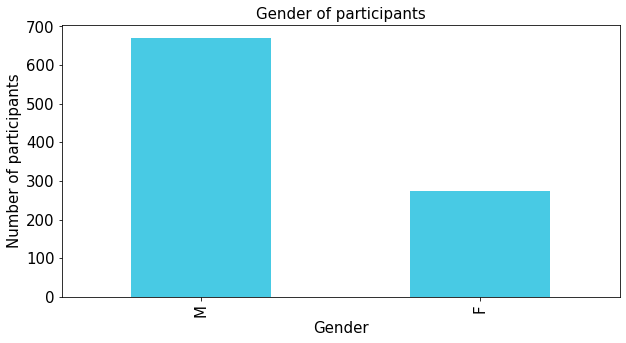

In [26]:
plt.figure(figsize=(10,5))
user['gender'].value_counts().plot(kind='bar', fontsize=15, color='#48cae4')
plt.title('Gender of participants', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.ylabel('Number of participants', fontsize=15)
plt.show()

'occupation'

In [27]:
user['occupation'].value_counts()

student          196
other            105
educator          95
administrator     79
engineer          67
programmer        66
librarian         51
writer            45
executive         32
scientist         31
artist            28
technician        27
marketing         26
entertainment     18
healthcare        16
retired           14
lawyer            12
salesman          12
none               9
homemaker          7
doctor             7
Name: occupation, dtype: int64

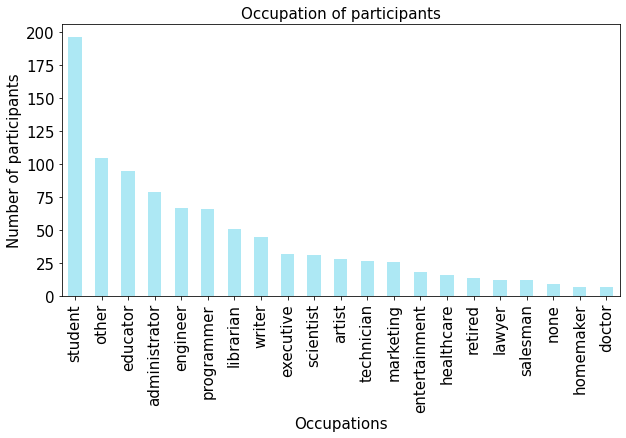

In [28]:
plt.figure(figsize=(10,5))
user['occupation'].value_counts().plot(kind='bar', fontsize=15, color='#ade8f4')
plt.title('Occupation of participants', fontsize=15)
plt.xlabel('Occupations', fontsize=15)
plt.ylabel('Number of participants', fontsize=15)
plt.show()

Visualize how popularity of Genres has changed over the years. 

In [29]:
genres_data = item.groupby(item.release_date.dt.year).agg(Unknown = ('unknown', 'sum'),
                                                          Action = ('Action', 'sum'),
                                                          Adventure = ('Adventure', 'sum'),
                                                          Animation = ('Animation', 'sum'),
                                                          Children = ("Children's", 'sum'),
                                                          Comedy = ('Comedy', 'sum'),
                                                          Crime = ('Crime', 'sum'),
                                                          Documentary = ('Documentary', 'sum'),
                                                          Drama = ('Drama ', 'sum'),
                                                          Fantasy = ('Fantasy', 'sum'),
                                                          Noir = ('FilmNoir', 'sum'),
                                                          Horror = ('Horror', 'sum'),
                                                          Musical = ('Musical', 'sum'),
                                                          Mystery = ('Mystery', 'sum'),
                                                          Romance = ('Romance', 'sum'),
                                                          SciFi =  ('SciFi', 'sum'),
                                                          Thriller = ('Thriller', 'sum'),
                                                          War = ('War', 'sum'),
                                                          Western = ('Western', 'sum'))

genres_data                          
                          

,Unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Noir,Horror,Musical,Mystery,Romance,SciFi,Thriller,War,Western
release_date,,,,,,,,,,,,,,,,,,,
1922.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1926.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1930.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1931.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0
1932.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994.0,0,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6
1995.0,0,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2
1996.0,0,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2


In [30]:
genres_data.columns.values

array(['Unknown', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Noir',
       'Horror', 'Musical', 'Mystery', 'Romance', 'SciFi', 'Thriller',
       'War', 'Western'], dtype=object)

In [31]:
genres_data.max(axis=1)

release_date
1922.0      1
1926.0      1
1930.0      1
1931.0      1
1932.0      1
         ... 
1994.0     97
1995.0     89
1996.0    170
1997.0    113
1998.0     33
Length: 71, dtype: int64

In [32]:
genres_data.idxmax(axis=1)

release_date
1922.0     Horror
1926.0      Drama
1930.0      Drama
1931.0      Crime
1932.0    Romance
           ...   
1994.0      Drama
1995.0      Drama
1996.0      Drama
1997.0      Drama
1998.0      Drama
Length: 71, dtype: object

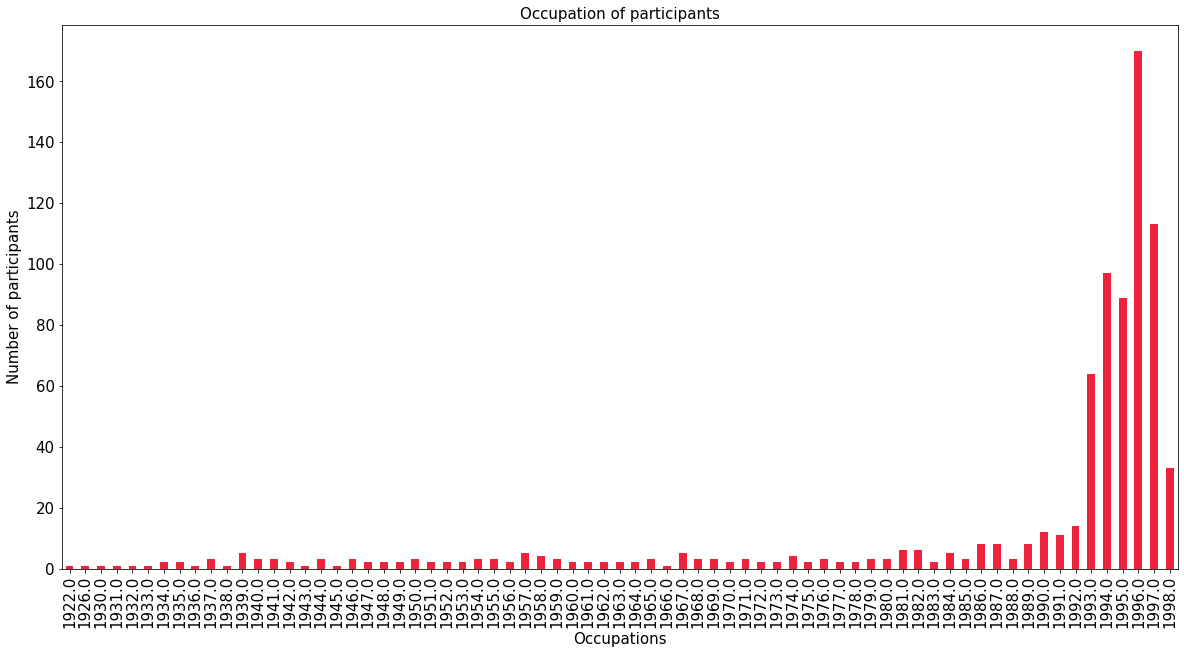

In [33]:
plt.figure(figsize=(20,10))
genres_data.max(axis=1).plot(kind='bar', fontsize=15, color='#ef233c')
#plt.bar_label(genres_data.idxmax(axis=1).values)
plt.title('Occupation of participants', fontsize=15)
plt.xlabel('Occupations', fontsize=15)
plt.ylabel('Number of participants', fontsize=15)
plt.show()